### Imports

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [50]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2017-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2922 non-null   float64
 1   High    2922 non-null   float64
 2   Low     2922 non-null   float64
 3   Open    2922 non-null   float64
 4   Volume  2922 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 137.0 KB


In [52]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

### Feature engineering

In [53]:
df.asfreq('B')
df = df.ffill()

In [54]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [55]:
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))
df["SMA_short"] = df["Close"].rolling(window=20).mean()
df["SMA_long"] = df["Close"].rolling(window=50).mean()
df["volatility"] = df["log_return"].rolling(window=20).std()

In [56]:
df.isnull().sum()

Close          0
High           0
Low            0
Open           0
Volume         0
log_return     1
SMA_short     19
SMA_long      49
volatility    20
dtype: int64

In [57]:
df.dropna(inplace=True)

### Visualization

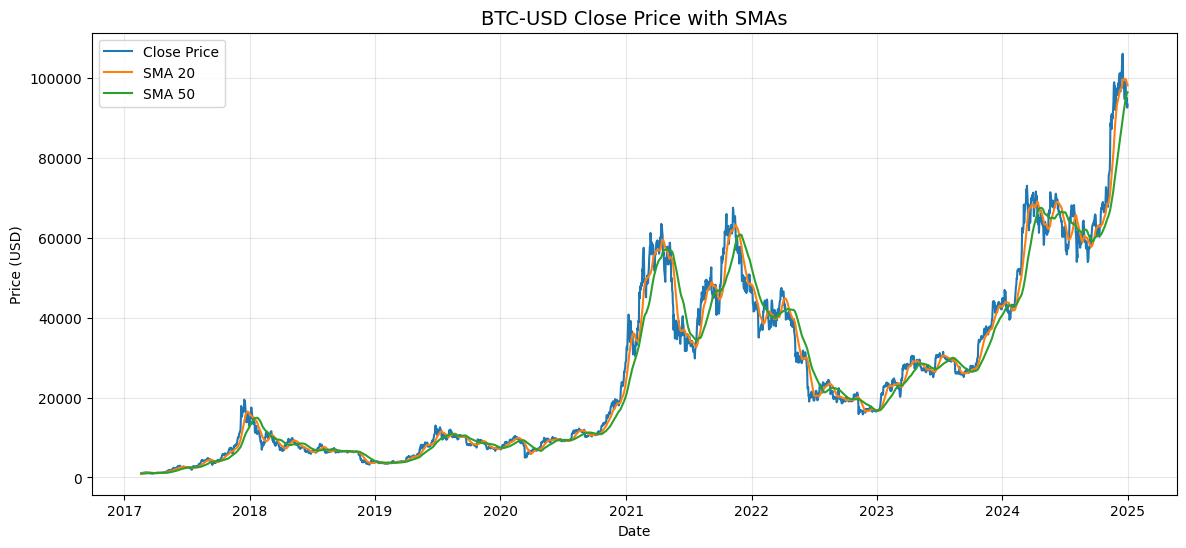

In [61]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Close Price", linewidth=1.5)
plt.plot(df.index, df["SMA_short"], label=f"SMA 20")
plt.plot(df.index, df["SMA_long"], label=f"SMA 50")
plt.title("BTC-USD Close Price with SMAs", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


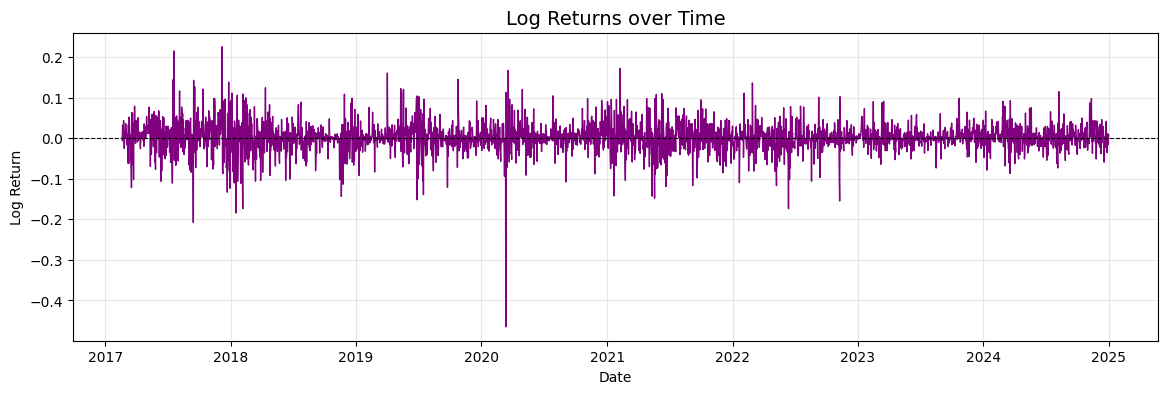

In [62]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["log_return"], color="purple", linewidth=1)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Log Returns over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(alpha=0.3)
plt.show()

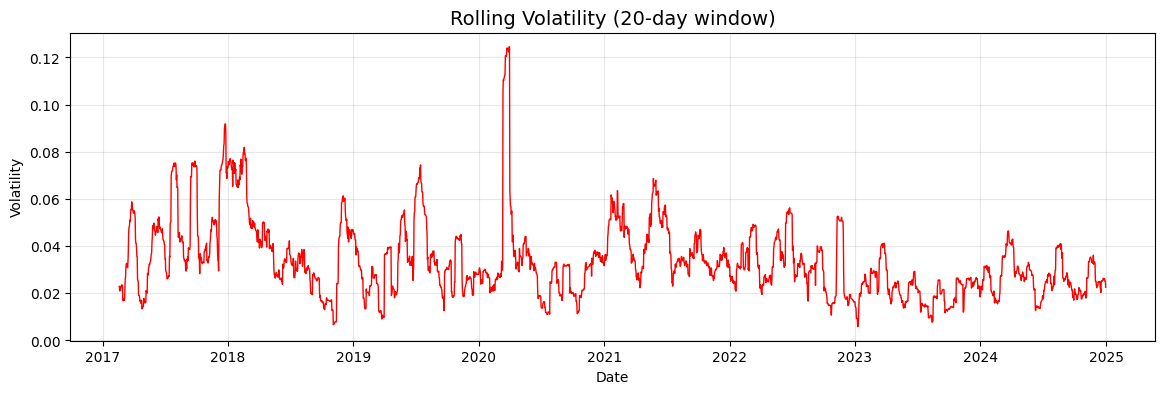

In [63]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["volatility"], color="red", linewidth=1)
plt.title(f"Rolling Volatility (20-day window)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(alpha=0.3)
plt.show()

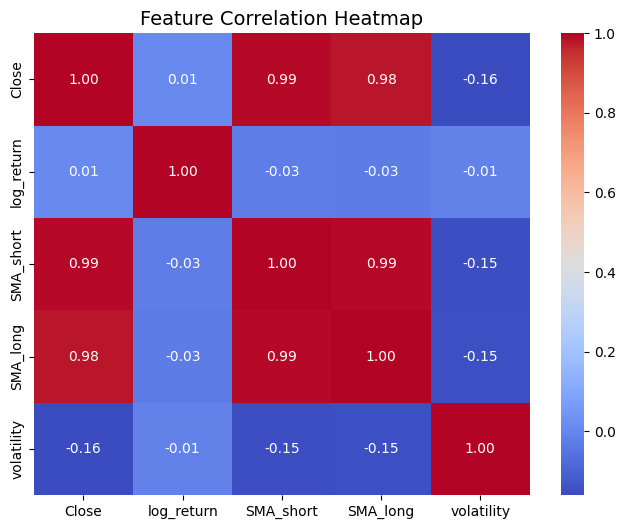

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Close", "log_return", "SMA_short", "SMA_long", "volatility"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [65]:
df.to_csv("data.csv", index=True)